In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from timm.scheduler.cosine_lr import CosineLRScheduler
from torch import nn

In [2]:
# https://github.com/rwightman/pytorch-image-models/blob/master/timm/scheduler/cosine_lr.py
# https://github.com/rwightman/efficientdet-pytorch/blob/master/train.py

# class: timm.scheduler.cosine_lr.CosineLRScheduler
# params:
#     # num epochs
#     t_initial: 300
#     # learning rate cycle len multiplier
#     t_mul: 1.0
#     # lower lr bound for cyclic schedulers that hit 0
#     lr_min: 1e-5
#     # LR decay rate
#     decay_rate: 0.1
#     warmup_lr_init: 0.0001
#     # epochs to warmup LR
#     warmup_t: 5
#     # learning rate cycle limit
#     cycle_limit: 1
#     t_in_epochs: true
#     noise_range_t: ~
#     noise_pct: 0.67
#     noise_std: 1.0
#     noise_seed: 333

0
1.2416169951519549e-05
1.2416169951519549e-05
1.2416169951519549e-05
1.2416169951519549e-05


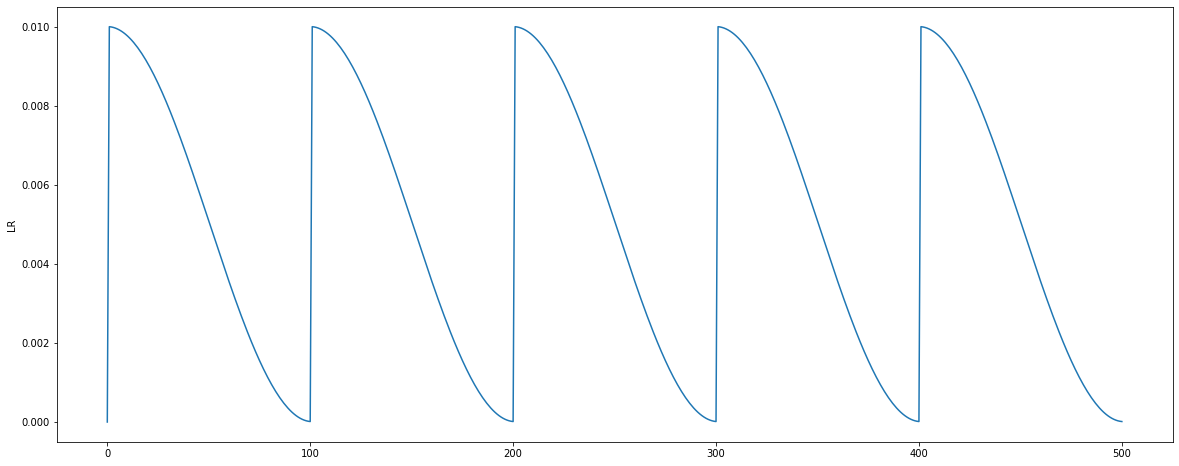

In [3]:
p = nn.Parameter(torch.empty(10, 10))
optim = torch.optim.SGD([p], 0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optim, 101, eta_min=1e-5)

epochs = 5

lr = [0]
init_state = scheduler.state_dict()

for i, e in enumerate(range(epochs)):
    print(lr[-1])
    for step in range(100):
        scheduler.step()
    
        v = optim.param_groups[0]['lr']
        lr.append(v)
        
    scheduler.load_state_dict(init_state)
        
plt.figure(figsize=(20, 8))
plt.plot(lr)
plt.ylabel('LR')
plt.show()

/home/dmitry/anaconda3/envs/latest/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


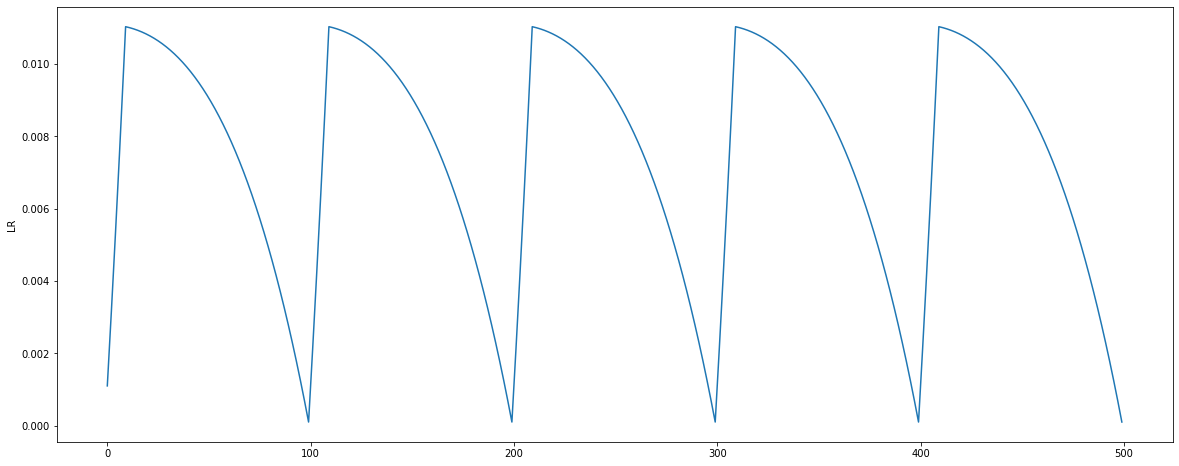

In [4]:
p = nn.Parameter(torch.empty(10, 10))
optim = torch.optim.SGD([p], 0.01)
scheduler = torch.optim.lr_scheduler.CyclicLR(optim, base_lr=1e-4, max_lr=0.01, mode="exp_range", 
                                              step_size_up=10, step_size_down=90, gamma=1.01)

epochs = 5

lr = []
init_state = scheduler.state_dict()

for i, e in enumerate(range(epochs)):
    for step in range(100):
        scheduler.step()
    
        v = optim.param_groups[0]['lr']
        lr.append(v)
        
    scheduler.load_state_dict(init_state)
        
plt.figure(figsize=(20, 8))
plt.plot(lr)
plt.ylabel('LR')
plt.show()

In [5]:
scheduler.state_dict()

{'max_lrs': [0.01],
 'total_size': 100.0,
 'step_ratio': 0.1,
 'mode': 'exp_range',
 'gamma': 1.01,
 'scale_fn': <bound method CyclicLR._exp_range_scale_fn of <torch.optim.lr_scheduler.CyclicLR object at 0x7fa4960226d0>>,
 'scale_mode': 'iterations',
 'cycle_momentum': True,
 'base_momentums': [0.8],
 'max_momentums': [0.9],
 'base_lrs': [0.0001],
 'last_epoch': 0,
 '_step_count': 1,
 '_get_lr_called_within_step': False,
 '_last_lr': [0.0001]}

/home/dmitry/anaconda3/envs/latest/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


{'total_steps': 100, 'step_size_up': 9.0, 'step_size_down': 90.0, 'anneal_func': <bound method OneCycleLR._annealing_cos of <torch.optim.lr_scheduler.OneCycleLR object at 0x7fa496039510>>, 'cycle_momentum': True, 'use_beta1': True, 'base_lrs': [0.0004], 'last_epoch': 0, '_step_count': 1, '_get_lr_called_within_step': False, '_last_lr': [0.0003999999999999993]}


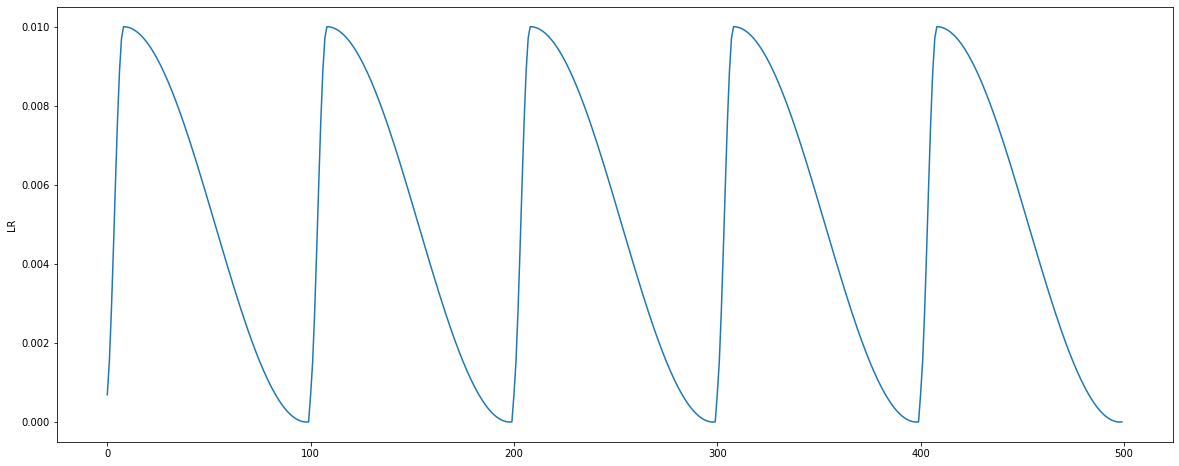

In [6]:
p = nn.Parameter(torch.empty(10, 10))
optim = torch.optim.AdamW([p], 0.01)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=0.01, total_steps=100, pct_start=0.1)

print(scheduler.state_dict())

epochs = 5

lr = []
init_state = scheduler.state_dict()

for i, e in enumerate(range(epochs)):
    for step in range(100):
        scheduler.step()
    
        v = optim.param_groups[0]['lr']
        lr.append(v)
        
    scheduler.load_state_dict(init_state)
    scheduler._step_count = 1
        
plt.figure(figsize=(20, 8))
plt.plot(lr)
plt.ylabel('LR')
plt.show()

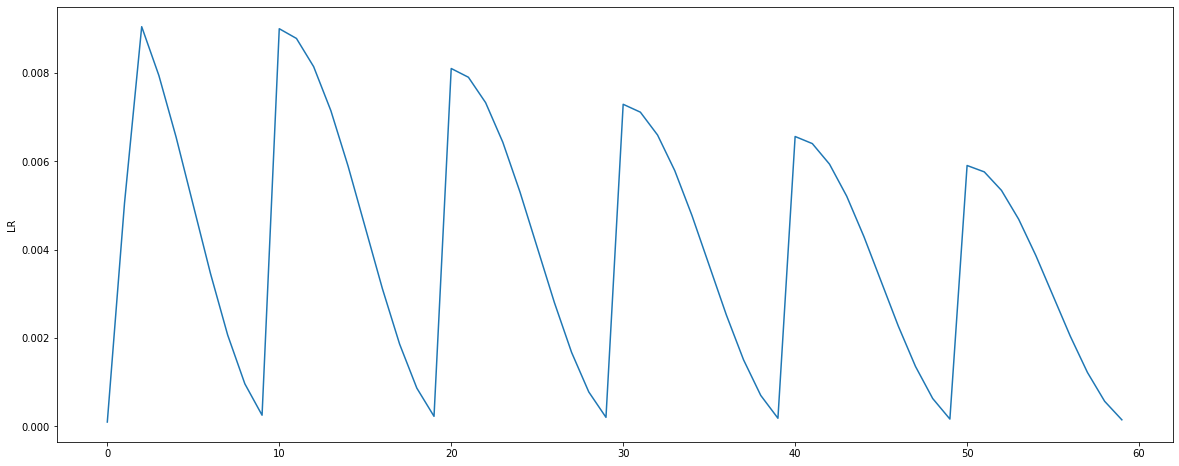

In [7]:
p = nn.Parameter(torch.empty(10, 10))
optim = torch.optim.SGD([p], 0.01, momentum=0.9)

scheduler = CosineLRScheduler(optim, t_initial=10, t_mul=1.0, lr_min=1e-5, 
                              warmup_t=2, 
                              warmup_lr_init=1e-4, decay_rate=0.9)

epochs = 60

lr = []
for i, e in enumerate(range(epochs)):
    v = scheduler.get_epoch_values(e)[0]
    lr.append(v)

plt.figure(figsize=(20, 8))
plt.plot(lr)
plt.ylabel('LR')
plt.show()

In [8]:
# scheduler.step??
# values = self.get_epoch_values(epoch)

# scheduler.step_update??
# values = self.get_update_values(num_updates)